In [55]:
import uproot
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt


In [57]:
file = uproot.open(
    r"C:/Users/User/Downloads/CMS/1BE226A3-7A8D-1B43-AADC-201B563F3319.root"
)

events = file["Events"]

In [58]:
mu_pt  = events["Muon_pt"].arrays(library="ak")["Muon_pt"]
mu_eta = events["Muon_eta"].arrays(library="ak")["Muon_eta"]
mu_phi = events["Muon_phi"].arrays(library="ak")["Muon_phi"]
mu_mass = events["Muon_mass"].arrays(library="ak")["Muon_mass"]

In [59]:
mask_2mu = ak.num(mu_pt) >= 2

mu_pt  = mu_pt[mask_2mu]
mu_eta = mu_eta[mask_2mu]
mu_phi = mu_phi[mask_2mu]
mu_mass = mu_mass[mask_2mu]


In [60]:
mu1 = ak.zip({
    "pt": mu_pt[:, 0],
    "eta": mu_eta[:, 0],
    "phi": mu_phi[:, 0],
    "mass": mu_mass[:, 0],
})

mu2 = ak.zip({
    "pt": mu_pt[:, 1],
    "eta": mu_eta[:, 1],
    "phi": mu_phi[:, 1],
    "mass": mu_mass[:, 1],
})


In [61]:
pt_cut = (mu1.pt > 10) & (mu2.pt > 10)

mu1 = mu1[pt_cut]
mu2 = mu2[pt_cut]


In [62]:
def inv_mass(mu1, mu2):
    return np.sqrt(
        2 * mu1.pt * mu2.pt *
        (np.cosh(mu1.eta - mu2.eta) - np.cos(mu1.phi - mu2.phi))
    )

mass = inv_mass(mu1, mu2)


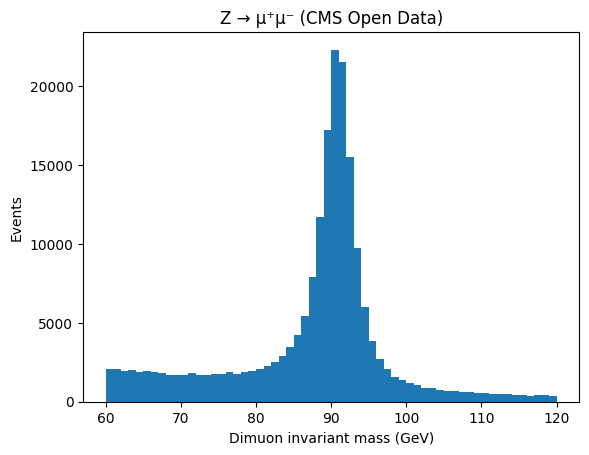

In [63]:
plt.hist(mass, bins=60, range=(60, 120))
plt.xlabel("Dimuon invariant mass (GeV)")
plt.ylabel("Events")
plt.title("Z → μ⁺μ⁻ (CMS Open Data)")
plt.show()
